In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
%matplotlib inline
###### Explore the Data #####

In [3]:
dataset = pd.read_csv("train.csv")

In [4]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [6]:
# Correlation Matrix

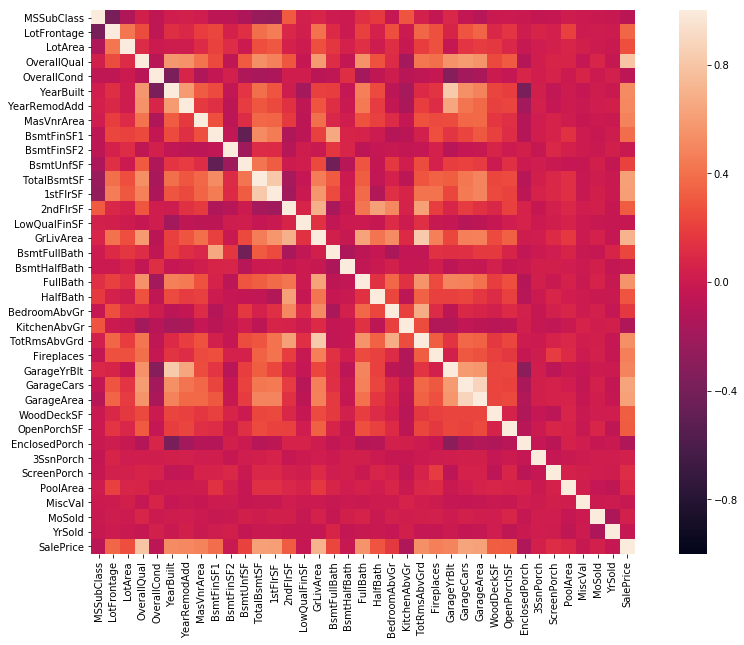

In [7]:
# Correlation of Numerical Features
# Exclude ID and SalesPrice
corr = dataset.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize = (16, 10))
sns.heatmap(corr, vmax = 1, vmin = -1, square = True)

/Users/Joy/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


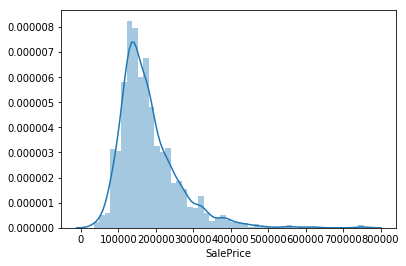

In [8]:
# Hist of Saleprice

sns.distplot(dataset['SalePrice'])

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

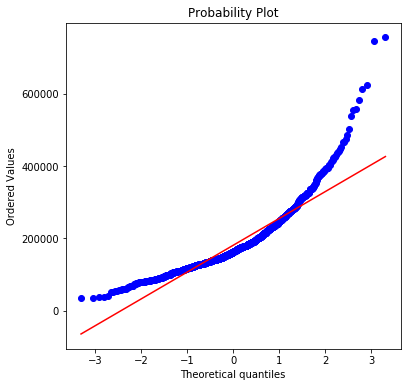

In [9]:
# QQ-plot for SalePrice
fig = plt.figure(figsize = (6,6))
stats.probplot(dataset['SalePrice'], plot = plt)

In [10]:
# Missing Data
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent Missing'])

In [11]:
missing_data = missing_data[missing_data['Total Missing'] != 0]
missing_data

,Total Missing,Percent Missing
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [12]:
dataset[dataset['PoolQC'].notnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [13]:
dataset[dataset['PoolArea'] !=0]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
197,198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
810,811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1170,1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1386,1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1423,1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [14]:
# We have 2 cols about Pool: Pool Area (Numeric) and PoolQC (Categorical)
# There are only 7 houses have pool
# We can combine these 2 predictor into 1 by simply multiply them

In [15]:
# Encoding PoolQC
dataset['PoolQC'] = dataset['PoolQC'].fillna("None")

In [16]:
dataset['PoolQC'] = dataset['PoolQC'].map({'None': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4})

In [17]:
dataset['PoolQC'].value_counts()

0    1453
3       3
4       2
1       2
Name: PoolQC, dtype: int64

In [18]:
dataset['PoolScore'] = dataset['PoolArea'] * dataset['PoolQC']

In [19]:
dataset = dataset.drop(columns = ['PoolArea', 'PoolQC'])

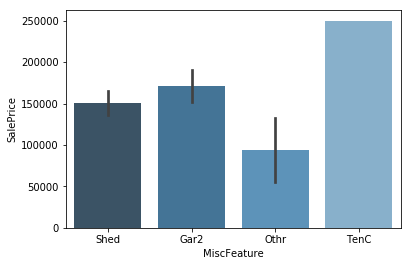

In [20]:
sns.barplot(x = 'MiscFeature', y = 'SalePrice', data = dataset[dataset['MiscFeature'].notnull()][['MiscFeature', 'SalePrice']], palette='Blues_d')

In [21]:
# MiscFeature looks irrelevant, especially we have column MiscVal, which seems to make more sense. So remove.

In [22]:
dataset = dataset.drop(columns = ['MiscFeature'])

In [23]:
# Let's also drop ID
dataset = dataset.drop(columns = ['Id'])

In [24]:
# Encoding Alley
dataset['Alley'] = dataset['Alley'].fillna("None")
dataset['Alley'] = dataset['Alley'].map({'None': 0, 'Grvl': 1, 'Pave': 2})

In [25]:
dataset['Alley'].value_counts()

0    1369
1      50
2      41
Name: Alley, dtype: int64

In [26]:
# Encoding Fence:
dataset['Fence'] = dataset['Fence'].fillna("None")
dataset['Fence'] = dataset['Fence'].map({'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})

In [27]:
dataset['Fence'].value_counts()

0    1179
3     157
4      59
2      54
1      11
Name: Fence, dtype: int64

In [28]:
# Encoding FireplaceQu
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna("None")
dataset['FireplaceQu'] = dataset['FireplaceQu'].map({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [29]:
dataset['FireplaceScore'] = dataset['FireplaceQu'] * dataset['Fireplaces']
dataset = dataset.drop(columns = ['FireplaceQu', 'Fireplaces'])

In [30]:
# LotFrontage
# Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
dataset['LotFrontage'] = dataset.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

In [31]:
# Garage
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

In [32]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    dataset[col] = dataset[col].fillna('None')

In [33]:
# GarageType has no order? Decide later
# GarageFinish
dataset['GarageFinish'] = dataset['GarageFinish'].map({'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})
# GarageQual
dataset['GarageQual'] = dataset['GarageQual'].map({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
# GarageCond
dataset['GarageCond'] = dataset['GarageCond'].map({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})

In [34]:
# GarageYrBlt: Replacing missing data with 0
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(0)

In [35]:
# Basement
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2: Replacing missing data with None
# Record 948 showing no bsmt in BsmtExposure but has values in other cols
dataset[dataset['BsmtExposure'].isnull()][['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN
90,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN
182,NaN,NaN,NaN,NaN,NaN
259,NaN,NaN,NaN,NaN,NaN
342,NaN,NaN,NaN,NaN,NaN
362,NaN,NaN,NaN,NaN,NaN
371,NaN,NaN,NaN,NaN,NaN


In [36]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    dataset[col] = dataset[col].fillna('None')

In [37]:
# BsmtQual
dataset['BsmtQual'] = dataset['BsmtQual'].map({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
# BsmtCond
dataset['BsmtCond'] = dataset['BsmtCond'].map({'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5})
# BsmtExposure
dataset['BsmtExposure'] = dataset['BsmtExposure'].map({'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})
# BsmtFinType1
dataset['BsmtFinType1'] = dataset['BsmtFinType1'].map({'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})
# BsmtFinType2
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].map({'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6})


In [38]:
# MasVnr
# MasVnrType: replace missing data with none. Seems no order, Hot Encode later
dataset['MasVnrType'] = dataset['MasVnrType'].fillna('None')
# MasVnrArea: replace missing data with 0.
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)

In [39]:
# Electrical: only 1 missing data, just assign to the mode.
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])

In [40]:
# Great! Now we don't have any missing values
dataset.isnull().sum().sum()

0

In [41]:
dataset.dtypes[dataset.dtypes == 'object'] 

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [72]:
# Now let's check if any remaining categorical variables should have ordered label
# We will manually fix those and hot encode the rest
dataset.isnull().sum().sum()

0

In [43]:
# Street
dataset['Street'] = dataset['Street'].map({'Grvl': 1, 'Pave': 2})

In [44]:
# LotShape
dataset['LotShape'] = dataset['LotShape'].map({'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4})

In [45]:
# Utilities
dataset['Utilities'] = dataset['Utilities'].map({'ELO': 1, 'NoSeWa': 2, 'NoSewr': 3, 'AllPub': 4})

In [46]:
# LandSlope
dataset['LandSlope'] = dataset['LandSlope'].map({'Sev': 1, 'Mod': 2, 'Gtl': 3})

In [47]:
# ExterQual
dataset['ExterQual'] = dataset['ExterQual'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5})

In [48]:
# ExterCond
dataset['ExterCond'] = dataset['ExterCond'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5})

In [49]:
# HeatingQC
dataset['HeatingQC'] = dataset['HeatingQC'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5})

In [50]:
# CentralAir
dataset['CentralAir'] = dataset['CentralAir'].map({'N': 0, 'Y': 1})

In [51]:
# KitchenQual
dataset['KitchenQual'] = dataset['KitchenQual'].map({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex':5})

In [52]:
# Functional
dataset['Functional'] = dataset['Functional'].map({'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8})

In [71]:
# GarageType
dataset['GarageType'] = dataset['GarageType'].map({'None': 0, 'Detchd': 1, 'CarPort': 2, 'BuiltIn': 3, 'Basment': 4, 'Attchd': 5, '2Types': 6})

In [54]:
# PavedDrive
dataset['PavedDrive'] = dataset['PavedDrive'].map({'N': 0, 'P': 1, 'Y': 2})

In [73]:
# Changing Some Numericals into categoricals
# Year and Month Sold
dataset['YrSold'] = dataset['YrSold'].astype(str)
dataset['MoSold'] = dataset['MoSold'].astype(str)

In [74]:
# MSSubClass
dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)

In [75]:
dataset.dtypes[dataset.dtypes == 'object']

MSSubClass       object
MSZoning         object
LandContour      object
LotConfig        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
Foundation       object
Heating          object
Electrical       object
MoSold           object
YrSold           object
SaleType         object
SaleCondition    object
dtype: object

In [58]:
 # One hot encoding for these variables

In [78]:
train = pd.get_dummies(dataset, columns=list(dataset.select_dtypes(include=['category','object'])))

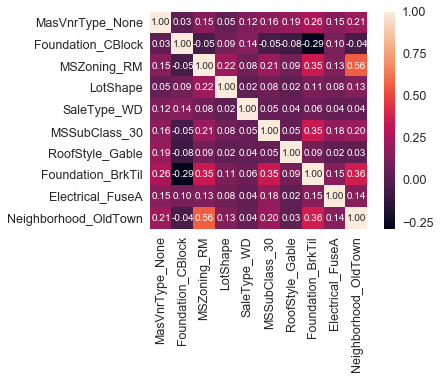

In [111]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = train.corr()
cols = corrmat.nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [147]:
y_train = train['SalePrice'].values
y_train = np.log1p(y_train)

X_train = train.drop(columns = ['SalePrice']).values

In [135]:
##### This part is designed for detecting multicolinearity
##### It's not necessary for our model as Lasso and XGBoost can perform feature selection as built-in

# from sklearn.decomposition import KernelPCA
# # normalize data
# from sklearn import preprocessing
# data_scaled = pd.DataFrame(preprocessing.scale(X_train),columns = X_train.columns) 

# # Scale X_train
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# # PCA
# kpca = KernelPCA(n_components=2, kernel = 'rbf')

# kpca_transform = kpca.fit_transform(data_scaled.values)
# explained_variance = np.var(kpca_transform, axis=0)
# explained_variance_ratio = explained_variance / np.sum(explained_variance)
# explained_variance
# Dump components relations with features:
# pca_result = pd.DataFrame(pca.components_,columns=data_scaled.columns,index = ['PC-1','PC-2'])
# pca.explained_variance_

# Scale X_train
# from sklearn.prerpocessing import StandardScaler
# sc = StandardScalar()
# X_scaled = sc.fit_transform(X_train)

# VIF Test
# from statsmodels.stats.outliers_influence import variance_inflation_factor    

# def calculate_vif_(X, thresh=10):
#     cols = X.columns
#     variables = np.arange(X.shape[1])
#     dropped=True
#     while dropped:
#         dropped=False
#         c = X[cols[variables]].values
#         vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

#         maxloc = vif.index(max(vif))
#         if max(vif) > thresh:
#             print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
#             variables = np.delete(variables, maxloc)
#             dropped=True

#     print('Remaining variables:')
#     print(X.columns[variables])
#     return X[cols[variables]]


In [151]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [155]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [156]:
# Lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1444 (0.0286)



/Users/Joy/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


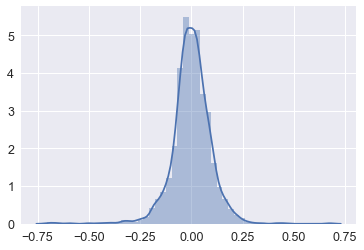

In [168]:
# Now let's take a look at the residual. It's a perfect normal distribution!
y_pred_lasso = lasso.fit(X_train, y_train).predict(X_train)
sns.distplot(y_train-y_pred_lasso)

In [157]:
# XGBoost
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1215 (0.0096)



/Users/Joy/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


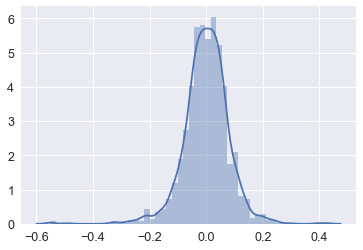

In [169]:
# Now let's take a look at the residual. It's a perfect normal distribution with smaller variance compared to Lasso!
y_pred_xgboost = model_xgb.fit(X_train, y_train).predict(X_train)
sns.distplot(y_train-y_pred_xgboost)